In [5]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [8]:
# Cargar los datos desde el archivo .pkl
with open('datos/df_normalizado.pkl', 'rb') as file:
    datos_migracion = pickle.load(file)

# Dividir los datos en características (X) y la variable objetivo (y)
X = datos_migracion[['Total Number of Dead and Missing', 'Number of Survivors', 'Number of Females', 'Number of Males', 'Number of Children']]
y = datos_migracion['Year']  # 'variable_objetivo' 

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir el modelo de regresión lineal en scikit-learn
model = LinearRegression()

# Entrenar el modelo
model.fit(X_scaled, y)

# Ahora, para predecir para el año 2024, necesitamos crear un nuevo conjunto de datos X_2024 con las características para ese año
# Asumamos que las características para el año 2024 son las mismas que para el año 2023
X_2024 = X.copy()

# Escalar las características para el año 2024
X_2024_scaled = scaler.transform(X_2024)

# Hacer la predicción para el año 2024
prediccion_2024 = model.predict(X_2024_scaled)

# Imprimir la predicción para el año 2024
print("Predicción para el año 2024:", prediccion_2024)

Predicción para el año 2024: [0. 0. 0. ... 0. 0. 0.]


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hacer predicciones en el conjunto de entrenamiento
predicciones = model.predict(X_scaled)

# Calcular el MSE
mse = mean_squared_error(y, predicciones)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el MAE
mae = mean_absolute_error(y, predicciones)
print("MAE:", mae)

# Calcular el R^2
r2 = r2_score(y, predicciones)
print("R^2:", r2)

MSE: 0.0
RMSE: 0.0
MAE: 0.0
R^2: 1.0


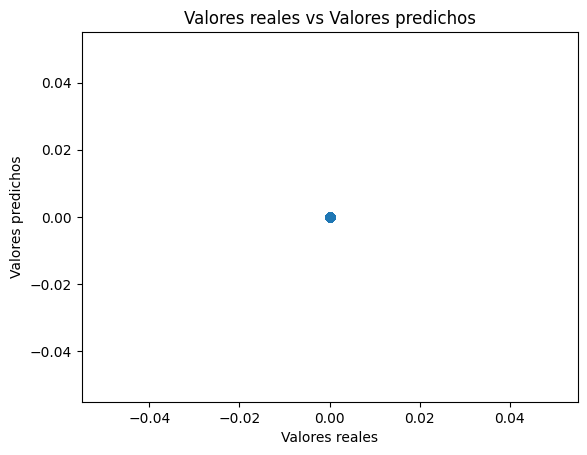

In [10]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de entrenamiento
predicciones = model.predict(X_scaled)

# Crear un gráfico de dispersión de los valores reales frente a los valores predichos
plt.scatter(y, predicciones)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Valores predichos')

# Dibujar una línea de identidad (una línea que pasa por el origen con pendiente 1)
# Los valores predichos perfectos se ubicarían en esta línea
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')

plt.show()